<div dir="rtl">
برای این تمرین، من از کتابخانه pycryptodome استفاده کرده‌ام. کتابخانه‌های دیگری مانند RSA و AES نیز برای پایتون وجود داشت اما به دلیل اینکه باید هرکدام را جدا نصب می‌کردیم، و از طرفی این کتابخانه همه‌ی آن‌ها را در دل خود دارد، من از این کتابخانه استفاده کردم. همچنین این کتابخانه را از لینک زیر پیدا کردم: <br>
<a>https://stackoverflow.com/questions/12524994/encrypt-and-decrypt-using-pycrypto-aes-256</a>
<br>
همچنین از داکیومنت خود این کتابخانه نیز استفاده کرده‌ام.
<br>
<a>https://www.pycryptodome.org/src/examples</a>
</div>

In [1]:
pip install pycryptodome    

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


<div dir="rtl">
<strong>قسمت اول</strong>
<br>
<strong>پیاده‌سازی پیام‌رسان امن با استفاده از الگوریتم RSA</strong>
</div>

<div dir="rtl">
برای این قسمت از سوال با توجه به چیزی که بالاتر گفتیم، با استفاده از کتابخانه کلید‌ها را برای هر دو کاربر generate می‌کنیم.
</div>

<div dir="rtl">
<strong>ساخت کلید</strong>
</div>

In [2]:
#Generate RSA keys for user 1
from Crypto.PublicKey import RSA

key = RSA.generate(1024)
user1_private_key = key

user1_public_key = key.publickey()

print("User1 Private Key:\n"+str(user1_private_key))
print("User1 Public Key:\n"+str(user1_public_key))

User1 Private Key:
Private RSA key at 0x7F3CBC7531F0
User1 Public Key:
Public RSA key at 0x7F3CBD87B3D0


In [3]:
#Generate RSA keys for user 2
from Crypto.PublicKey import RSA

key = RSA.generate(1024)
user2_private_key = key

user2_public_key = key.publickey()

print("User2 Private Key:\n"+str(user1_private_key))
print("User2 Public Key:\n"+str(user1_public_key))

User2 Private Key:
Private RSA key at 0x7F3CBC7531F0
User2 Public Key:
Public RSA key at 0x7F3CBD87B3D0


<div dir="rtl">
<strong>ارسال نام و نام خانوادگی</strong>
</div>

<div dir="rtl">
برای این قسمت از سوال با توجه به نام کاربری هر کاربر، با استفاده از کلید عمومی کاربر متقابل پیام را با استفاده از توابع موجود در این کتابخانه رمز کرده و در متغیری می‌ریزیم. همچنین با استفاده از توابع این کتابخانه برای رمزگشایی، پیام را رمزگشایی می‌کنیم.
</div>

In [4]:
#Encrypt Name of user1 with user2 public key

from Crypto.PublicKey import RSA
from Crypto.Cipher import AES, PKCS1_OAEP

data = "AmirMahdi Kousheshi".encode("utf-8")

recipient_key = RSA.import_key(user2_public_key.export_key())

# Encrypt the session key with the public RSA key
cipher_rsa = PKCS1_OAEP.new(recipient_key)
enc_session_key = cipher_rsa.encrypt(data)

print(str(enc_session_key))

b'35\xb5\xf2f\x8d\xe3%n\x03\xa2\xfe\x85u(\xba\xcd\x9a\x18\xa1\xfbzB\xcc\x9c\x124\n\xa0\x82\r\x9eF\xfe+~\x7f\xdf\xd1\xfe\x9d3t\xd7\xac\x88)Fy\x98H\x0c\x94[\xfc\x07\x8f\xbe\x9c\xdd<\xc6\xe8Q\x08%\xf5L\x11Jz\x01xB\xb1GG\x90K\x8d\x0c\x10\xd0\x14\x85\x8fHNX*\x14z@JZ\x10{r\t\\y\xdc:\xd3PA\xd1A*\xfd\xbb\x13h\xfd`\xa1r\xbd\x1e\xe6\x9e?U\xaa39}P'


In [5]:
#Decrypt Name of user1
from Crypto.PublicKey import RSA
from Crypto.Cipher import AES, PKCS1_OAEP


private_key = RSA.import_key(user2_private_key.export_key())

# Decrypt the session key with the private RSA key
cipher_rsa = PKCS1_OAEP.new(private_key)
session_key = cipher_rsa.decrypt(enc_session_key)

print(session_key)

b'AmirMahdi Kousheshi'


In [6]:
#Encrypt Name of user2 with user1 public key

from Crypto.PublicKey import RSA
from Crypto.Cipher import AES, PKCS1_OAEP

data = "Dutchan Dutchmani".encode("utf-8")

recipient_key = RSA.import_key(user1_public_key.export_key())

# Encrypt the session key with the public RSA key
cipher_rsa = PKCS1_OAEP.new(recipient_key)
enc_session_key = cipher_rsa.encrypt(data)

print(str(enc_session_key))

b'n\xca\xc5-g\xe6\xf1\xee\xa7)\xc7\xea\x19\xcb\xc5\x990-\xb0\xebK\xc3\x03\x86))\xc8l\x07\x0e:\x9fn\xa5\xcc\xa2j\xa21\x91]H\x840\x16d6\xb7yYI\xbc\x9cV\x9e\xf0y}3\xb2}\xf2\xec\x04z\x809k3\xda\xe8{\xd1\xa8\xcf\x1c\xa9\xfbk\x9d"\x91\xc9\x80i7]\xc0qfh\x8e\x8b\xaf\x8eRwqt9\xfdA|\xf3>\n\x06\xbav\xf5=/\x02\xd0"\xee\x96 \r\x8a\xf8\xf7,\x8ay\x07\xd3\x11'


In [7]:
#Decrypt Name of user2
from Crypto.PublicKey import RSA
from Crypto.Cipher import AES, PKCS1_OAEP


private_key = RSA.import_key(user1_private_key.export_key())

# Decrypt the session key with the private RSA key
cipher_rsa = PKCS1_OAEP.new(private_key)
session_key = cipher_rsa.decrypt(enc_session_key)

print(session_key)

b'Dutchan Dutchmani'


<div dir="rtl">
<strong>درخواست ارسال عدد</strong>
</div>

In [8]:
#User1 wants a number

from Crypto.PublicKey import RSA
from Crypto.Cipher import AES, PKCS1_OAEP

data = "Dutchman Dutchmani: send number".encode("utf-8")

recipient_key = RSA.import_key(user2_public_key.export_key())

# Encrypt the session key with the public RSA key
cipher_rsa = PKCS1_OAEP.new(recipient_key)
enc_session_key = cipher_rsa.encrypt(data)

print(str(enc_session_key))

b"\xa0\x14\xd3z\x02\t\x9d\xb0\xea\xb6\xd7\x19\xb8\x9c\r\xf7\xb0\xcc\x19\xf3\xee\xa9}\xaa\rR\x8d{\xa8\xa8\xb5P,%\rf\xe6\x83\xc10\x14\xe65\xcb\xa8[B\xb2\xa0\xc1\xe0G\xd2\x1f<\r\x8b \xcb\xa2\x8a\x89M\xf3\x90TK\x988\xa7\xb9\xe3\xf7;no\xf2f\xf3D\x0f\x90\x1bT\xf1\xa2g{*\x94\xa2\xbe\xa8?j\x82\x10#\x1a\x8f\xd4\xaeg\xb4\x81'\xcc;z\xc6%\x0cgn\x16\xd0#]+\xb3\xe1\xdf\xde\xdb}JG\xe4"


In [9]:
#Decrypt user1 request for sending number
from Crypto.PublicKey import RSA
from Crypto.Cipher import AES, PKCS1_OAEP


private_key = RSA.import_key(user2_private_key.export_key())

# Decrypt the session key with the private RSA key
cipher_rsa = PKCS1_OAEP.new(private_key)
session_key = cipher_rsa.decrypt(enc_session_key)

print(session_key)

b'Dutchman Dutchmani: send number'


<div dir="rtl">
<strong>ارسال عدد</strong>
<br>
برای ارسال عدد، ما از روش رمزنگاری RSA استفاده کرده‌ایم. به این دلیل که اگر از خود کتابخانه استفاده کنیم به صورت استرینگ دیتا را رمز می‌کند و زمانی که می‌خواهیم آن را به توان برسانیم به مشکل می‌خوریم پس خودمان دستی مانند RSA آن را به توان می‌رسانیم. برای این کار ما از خود کلید عمومی کاربر ۲ استفاده می‌کنیم زیرا در نهایت باید با کلید خودش رمزگشایی کنیم و کاربر ۱ قرار نیست آن را رمزگشایی کند و تنها به توان می‌رساند.
<br>
عکس این رمزنگاری در زیر آمده است.
</div>

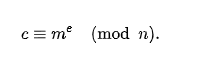

In [10]:
#User2 encrypt a random number and send it to user1

from Crypto.PublicKey import RSA
from Crypto.Cipher import AES, PKCS1_OAEP
import random

random_number = random.randint(1, 100)

recipient_key = RSA.import_key(user2_public_key.export_key())

encrypted_random_number = pow(random_number, recipient_key.e, recipient_key.n)

print(random_number)
print(encrypted_random_number)

99
76387152923960481869328984258120200372169223866575236235723584081603010335219917752968147162326865454802743610427954036886419929535530822335124481613181771875283164511795019967304961057293121657830410293848066222971888062661521466524036601902673289960836865484031444557110457876026902705718872128319805886481


In [11]:
#User1 raise the random number of user2 to a random power
from Crypto.PublicKey import RSA
from Crypto.Cipher import AES, PKCS1_OAEP
import random

private_key = RSA.import_key(user2_public_key.export_key())

random_power = random.randint(1, 100)
random_power_of_random_nummber = pow(encrypted_random_number, random_power, private_key.n)

print(random_power)
print(random_power_of_random_nummber)


45
39493970321636388001981201707108841834205409394666393916965901887075631409720395602432208996801964344157068698253550899964187992551554533059202398725032852842893965538805899707266512817865281348752128583424752539055619811871409162049696565633033192628185498916501652134115505951882056721972219319834523290904


<div dir="rtl">
<strong>به دست آوردن توان</strong>
<br>
برای اینکار مطابق چیزی که بالاتر برای رمزنگاری گفتیم، برای رمزگشایی نیز استفاده می‌کنیم. ابتدا پیام داده شده را به توان d می‌رسانیم که برای رمزگشایی است (در نهشت n) و سپس که بعد از رمزگشایی عدد توان را رمزگشایی کردیم، می‌توانیم از آن عدد لگاریم بگیریم در پایه‌ی همان عدد اصلی که خود کاربر ۲ آن را دارد و با این کار، توان به دست می‌آید.
</div>

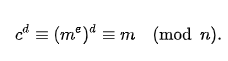

In [12]:
#Decrypt user1 power
import math
from Crypto.PublicKey import RSA
from Crypto.Cipher import AES


private_key = RSA.import_key(user2_private_key.export_key())

powerd_number = pow(random_power_of_random_nummber, private_key.d, private_key.n)

print(powerd_number)
print (power:=math.log(powerd_number, random_number))

636185486063871224577278269599438356286750793148313662587196470579383532879142704680104499
45.0


In [13]:
#User2 send guesed power to user1

from Crypto.PublicKey import RSA
from Crypto.Cipher import AES, PKCS1_OAEP

data = f"power is: {power}".encode("utf-8")

recipient_key = RSA.import_key(user1_public_key.export_key())

# Encrypt the session key with the public RSA key
cipher_rsa = PKCS1_OAEP.new(recipient_key)
enc_session_key = cipher_rsa.encrypt(data)

print(str(enc_session_key))

b" \xe1qES\xf5\xfd\xbb\xe2v\x86\x9b\x93?\x1b\x98\x06\xe8\xd5=\xbd\xa2\xcer\xa5.ZH\xe8\xdc\xabs\xfd\x0cWM\x9aF\x01\xe4Y\x1c\xdfn\xa5\x902\x1aC{$\xc5\\\x07!\x0e\xf8GDDc\xbf\xf8\x18\x1b'\xc4\x7f\xe3\xae9]\xd8<\x80e1\x0b\x1d\xbdCa\x96\xddHe\xd5\xad7\xf7\x82\x10\xd5\xc6\xf9\xd3'\x02\xde\x9d\xad3-\x9a\xe6\x9b{6\xbd\xa9}\x0b\xbe\x06\x80$\x0c\xd6,%\xda\xbbgg\xbd6\x94\xe3"


In [14]:
#Decrypt user2 gueses power number
from Crypto.PublicKey import RSA
from Crypto.Cipher import AES, PKCS1_OAEP


private_key = RSA.import_key(user1_private_key.export_key())

# Decrypt the session key with the private RSA key
cipher_rsa = PKCS1_OAEP.new(private_key)
session_key = cipher_rsa.decrypt(enc_session_key)

print(session_key)

b'power is: 45.0'


<div dir="rtl">
<strong>AES</strong>
<br>
با استفاده  از توابع موجود د راین کتابخانه ما یک کلید AES می‌سازیم و آن را با RSA رمز می‌کنیم و به کاربر ۲ می‌فرستیم.
</div>

In [15]:
#User1 encrypt a AES key and send to user2

from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
from Crypto.Random import get_random_bytes
from Crypto.PublicKey import RSA
from Crypto.Cipher import AES, PKCS1_OAEP


key = get_random_bytes(32)
iv = get_random_bytes(16)

recipient_key = PKCS1_OAEP.new(user2_public_key)

encrypted_data = recipient_key.encrypt(key + iv)

print(key)
print(iv)
print(encrypted_data)


b'\xae\x98\xc52i\x83\x1c\xbe\x19S?j$\xb0\xd3;M\x16\xee8\xa5p\x8c\xc0"H\x92\xd1\x02\xfa\xedp'
b'\xb9G\xc8R\xaa\xf7^\xac\xc4\xfe\x84\x94y\xc7\r\xf5'
b'e\xd9\xd7,Y-\xb24\x9c\x03\x14\x949\xcc\x1d\xc9`4\xca\xc3y\xaa\x82\xf5\xf2\xa2\x95K,\x8a\xc8\x19\x0e\xefU\xfdKN.y\xcb\xfbm40\x84\xf9\x04:9\\$\xca\xc9\xe2\x9f\xce\xf6\x00\x9a\x90_\xdcI\xa5\x04q\xbd\x08\xda\x0e\n\xdbt\xfd(\x03\xaa&\xec>\xb7&\xc28\xfeC\x189\x0f\x88q\x96\xa6q\xa7\xe9Ej0\x9e\x8c\xf1\xb0\xf4\x1b\xb0\xedH\x02\xa5f*\xb7\x1f\xe8\xa8\xa1\xca,\xde\x08\xaf\x9c\xc8Q\x17x'


<div dir="rtl">
<strong>رمزگشایی کلید AES و رمزنگاری hello</strong>
</div>

In [16]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
from Crypto.Random import get_random_bytes
from Crypto.PublicKey import RSA
from Crypto.Cipher import AES, PKCS1_OAEP
from Crypto.Util.Padding import unpad

key_iv = PKCS1_OAEP.new(user2_private_key).decrypt(encrypted_data)
aes_key = key_iv[:32]
aes_iv = key_iv[-16:]

print(aes_key)
print(aes_iv)

cipher = AES.new(aes_key, AES.MODE_CBC, aes_iv)

data = b"user1: Hello!"

cipher_text = cipher.encrypt(pad(data, 16))
print(cipher_text)


b'\xae\x98\xc52i\x83\x1c\xbe\x19S?j$\xb0\xd3;M\x16\xee8\xa5p\x8c\xc0"H\x92\xd1\x02\xfa\xedp'
b'\xb9G\xc8R\xaa\xf7^\xac\xc4\xfe\x84\x94y\xc7\r\xf5'
b"e\xe4'cAu\xe31\x15\x92-~\xfb\xb4\x81\x83"


In [17]:
cipher_user1 = AES.new(key, AES.MODE_CBC, iv)
text = unpad(cipher_user1.decrypt(cipher_text), 16)
print(text)

b'user1: Hello!'
